<a href="https://colab.research.google.com/github/pvanik1/FastAI/blob/master/Practice_kaggle_don't_overfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash
from fastai.tabular import *
import os

Updating fastai...
Done.


In [2]:
from google.colab import files
files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [2]:
df = pd.read_csv('train.csv', header='infer')
df.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [6]:
cont_names = list(df)[2:]
print(cont_names)
dep_var = 'target'

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '15

In [0]:
procs = [FillMissing, Normalize]

In [14]:
df.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [0]:
valid_idxs = list(range(200,249))
# valid_idxs = list(range(100,151))
# valid_idxs = list(range(0,51))

In [0]:
data = (TabularList.from_df(df, path=os.getcwd(), cont_names=cont_names, procs=procs)
                           .split_by_idx(valid_idxs)
                           .label_from_df(cols=dep_var, label_cls = CategoryList) # without setting label_cls, it turned into a regression problem assuming FloatList. Categorify didn't categorify Target
                           .databunch())

In [13]:
data.show_batch(rows=5)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,target
-0.0108,-1.9919,0.3824,-0.5007,-1.3109,-1.7969,-0.7165,0.6695,1.0857,0.0731,-0.7576,-1.0595,0.0330,0.6192,0.7294,-0.5582,-0.4426,-0.0610,0.1963,0.5963,1.0632,-0.8483,-0.0872,-0.1779,-0.0946,0.3107,-0.6911,0.5664,0.0779,0.1241,0.0847,-0.2624,1.9082,2.7560,-0.5191,1.5151,0.2579,-0.5117,-0.7099,1.0897,1.4426,-0.1085,0.3166,0.2009,-1.0681,-1.1821,-0.5145,-0.7458,-0.9682,0.0786,-1.8252,-0.0083,-1.4443,-0.6620,1.4723,-0.1125,-0.5030,-1.9015,0.2217,0.6320,-0.0012,1.0415,-0.2388,-0.8917,-2.5048,-0.5807,0.8131,-1.2293,0.8071,0.5211,-0.0085,-0.1086,-0.5045,-1.0835,1.5481,0.3672,-0.8147,-0.3827,-0.2384,-0.3705,-1.7522,-0.9452,-0.9031,1.7577,0.1429,1.5450,-0.4568,-0.2640,1.1199,-0.5453,-1.4806,-2.6090,0.7897,-1.1598,1.2167,1.6762,-0.0763,0.4039,0.1047,-0.6501,1.8016,0.9108,0.3719,-0.5272,-0.5456,0.8847,-0.2156,-0.0694,0.0517,1.3375,-0.3350,-0.6707,0.7193,1.1037,1.5305,1.9240,-0.4939,1.2811,0.1193,0.2969,1.0679,1.5355,1.0615,0.1898,-1.7249,-1.0107,1.7215,0.2832,0.7638,-0.5204,-0.7036,-0.5725,-0.7479,-0.2041,-1.4511,-0.5613,-2.7855,-0.9832,-1.1035,-1.8167,-0.1224,-1.4828,-0.8306,-1.8306,-1.8906,-1.3397,0.7480,0.6908,-0.1770,-1.8154,-0.2521,0.1592,0.5544,-0.2606,-1.9698,-0.1346,-0.0667,-0.7385,2.6148,-0.8108,0.4421,2.1285,1.0229,-0.0500,-0.8532,0.0845,2.5369,0.7260,-1.2095,0.7046,-0.5635,-0.6088,0.6591,-0.5872,-1.5328,0.0288,0.5971,0.4396,0.4822,0.0680,0.5311,-1.3746,-0.2412,0.3020,-0.4550,-1.2235,1.6066,-0.4661,-0.2188,0.2116,-0.3223,0.4032,0.6609,-1.2268,0.7048,-1.5374,-1.1425,-2.1005,-0.5262,-1.0198,-2.8711,-0.4013,0.3810,-0.1113,0.1139,1.9835,-0.3975,-0.6475,1.6231,-1.0596,-1.3889,-0.7056,0.5674,1.9099,-1.8847,-0.1125,0.3843,-0.3101,-2.1625,0.4719,-0.3293,0.9447,-0.3955,-1.4135,0.2224,-1.5278,-0.2525,-0.6128,-0.3444,-0.9506,-0.2654,1.8228,-0.2204,-1.0339,0.1884,0.7304,-0.3538,0.4015,0.2760,-1.0907,-0.1995,-2.4010,1.0809,-0.3153,-0.8508,-1.2670,-0.0374,0.8584,0.8938,0.3442,0.2488,-1.0735,-0.8878,2.0236,0.0721,0.0400,-0.6593,1.3931,-0.4333,-1.7673,1.5954,-0.3152,0.6766,-0.6318,-0.6113,-0.6352,0.3450,-1.2632,0.7278,-1.1594,0.2098,-0.1142,1.5407,-1.9491,-0.0297,2.0456,1.4371,0.0675,-0.5652,-1.2008,-1.1983,-1.4242,-1.4878,-0.0351,0.5098,-0.9649,-1.6530,-0.5012,-1.6426,-0.9726,-1.2700,1.4929,-0.5414,0.6769,-1.0740,0.7561,-0.6118,-1.4792,0.3298,1.2793,1.0
2.5158,1.3705,-1.4390,-0.0152,0.7941,0.8956,-0.6343,0.3852,-0.0090,-0.3144,-0.0738,2.8176,0.7850,-1.1683,0.2506,0.4602,0.5744,-0.3767,-0.8589,-0.0581,-0.6965,0.2176,1.2936,-1.2252,-0.8711,0.4883,-0.0393,-0.6435,0.3801,-0.4802,-0.7696,1.2914,0.0358,1.1492,0.4469,0.0152,-0.0606,0.8108,-0.1039,-1.8892,2.3121,1.1906,1.1547,0.8040,0.1404,0.8689,1.7169,2.4785,0.7165,0.9587,-0.5474,-1.6541,0.0183,2.2123,1.5342,0.8979,0.3740,0.4998,-0.3280,-0.3222,0.5972,0.2514,-1.1163,1.6969,0.7806,0.9168,1.4531,-0.6643,1.3096,0.2228,-0.8331,0.8065,0.0879,0.5293,-1.8119,-0.4145,-1.2342,0.3730,0.7437,0.0183,-1.1414,-0.1900,0.7426,-2.3084,-1.9

In [47]:
data.classes

[0.0, 1.0]

In [0]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [49]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.747347,0.684236,0.571429,00:00
1,0.604925,0.679505,0.571429,00:00
2,0.499909,0.676684,0.571429,00:00


In [50]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


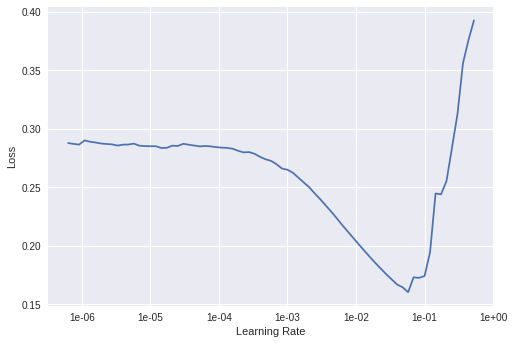

In [51]:
learn.recorder.plot()

In [0]:
learn.save('stage-1')

In [53]:
learn.unfreeze()
learn.fit_one_cycle(5,5e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.289591,0.743851,0.571429,00:00
1,0.317038,1.313362,0.591837,00:00
2,0.315119,1.328694,0.612245,00:00
3,0.269563,1.226226,0.612245,00:00
4,0.238339,1.057344,0.653061,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


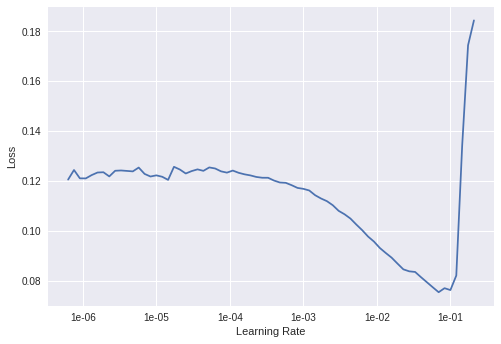

In [54]:
learn.lr_find()
learn.recorder.plot()

In [57]:
learn.load('stage-2')
learn.fit_one_cycle(6,1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,0.104185,1.615548,0.632653,00:00
1,0.065950,7.780332,0.571429,00:00
2,0.052822,7.372218,0.632653,00:00
3,0.059858,6.588466,0.571429,00:00
4,0.055193,5.386488,0.653061,00:00
5,0.045667,4.490587,0.653061,00:00


In [0]:
learn.save('stage-3')

In [0]:
learn1000 = tabular_learner(data, layers=[1000,500], metrics=accuracy)

In [62]:
learn1000.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.694675,0.687006,0.591837,00:00
1,0.466701,0.658506,0.612245,00:00
2,0.331540,0.635117,0.632653,00:00
3,0.248142,0.626211,0.632653,00:00
4,0.197370,0.623444,0.653061,00:00


In [0]:
learn1000.save('1000-stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


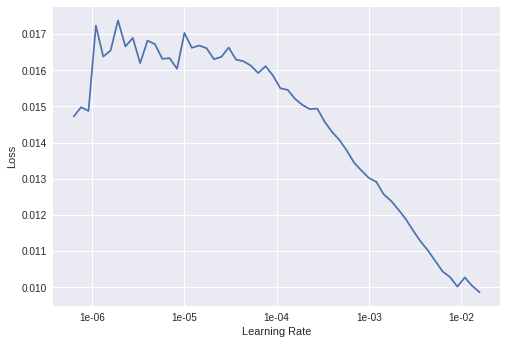

In [66]:
learn1000.lr_find()
learn1000.recorder.plot()

In [69]:
learn1000.unfreeze()
learn1000.fit_one_cycle(6, max_lr=8e-03)

epoch,train_loss,valid_loss,accuracy,time
0,0.017273,0.612587,0.632653,00:00
1,0.015414,1.164081,0.673469,00:00
2,0.074251,1.179274,0.673469,00:00
3,0.145129,1.268219,0.673469,00:00
4,0.128743,1.091218,0.693878,00:00
5,0.112870,1.030895,0.693878,00:00


In [0]:
learn1000.save('1000-stage-2')

**Inference**

In [0]:
learn.load('stage-3')
learn1000.load('1000-stage-2')

In [0]:
# grab row 0 like this: row = df.iloc[0]

In [0]:
import csv
with open('submission.csv', mode='w') as file:
  writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  writer.writerow(['id', 'target'])

  input = pd.read_csv('test.csv', header='infer')
  for index,row in input.iterrows():
    id = (row['id'])
    pred = learn.predict(input.iloc[index])
    print(id, pred)
    if (str(pred[0]) == "0.0"):
      probability = pred[2][0]
    elif (str(pred[0]) == 1.0):
      probability = pred[2][1]
    else:
      print("Something strange is going on...")
      probability = "ERROR"
    writer.writerow([id,probability])
file.close()

250.0 (Category 0.0, tensor(0), tensor([1.0000e+00, 1.9744e-09]))
251.0 (Category 0.0, tensor(0), tensor([1.0000e+00, 3.0118e-12]))
252.0 (Category 0.0, tensor(0), tensor([9.9971e-01, 2.8606e-04]))
253.0 (Category 1.0, tensor(1), tensor([6.4602e-14, 1.0000e+00]))
Something strange is going on...
254.0 (Category 1.0, tensor(1), tensor([1.4165e-07, 1.0000e+00]))
Something strange is going on...
255.0 (Category 0.0, tensor(0), tensor([9.9981e-01, 1.8943e-04]))
256.0 (Category 0.0, tensor(0), tensor([9.9998e-01, 1.6679e-05]))
257.0 (Category 0.0, tensor(0), tensor([1.0000e+00, 1.2352e-06]))
258.0 (Category 1.0, tensor(1), tensor([1.5307e-10, 1.0000e+00]))
Something strange is going on...
259.0 (Category 1.0, tensor(1), tensor([0.0468, 0.9532]))
Something strange is going on...
260.0 (Category 1.0, tensor(1), tensor([0.0014, 0.9986]))
Something strange is going on...
261.0 (Category 1.0, tensor(1), tensor([1.3533e-04, 9.9986e-01]))
Something strange is going on...
262.0 (Category 0.0, tenso

In [85]:
input = pd.read_csv('test.csv', header='infer')
input.head()
prob = learn.predict(input.iloc[0])
print(prob)

(Category 0.0, tensor(0), tensor([1.0000e+00, 1.9744e-09]))


In [98]:
input = pd.read_csv('test.csv', header='infer')
input.head()
pred = learn.predict(input.iloc[34])
print(pred[0])

1.0
